## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [2]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

data.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
X_train.shape

(294, 13)

### Regression Model Build

In [5]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

### train

In [7]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                   verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 58ms/step - loss: 620.1651 - mse: 620.1651 - val_loss: 568.5579 - val_mse: 568.5579
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 609.0592 - mse: 609.0592 - val_loss: 556.3098 - val_mse: 556.3098
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 597.8661 - mse: 597.8661 - val_loss: 544.1493 - val_mse: 544.1493
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 586.7039 - mse: 586.7039 - val_loss: 532.0413 - val_mse: 532.0413
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 575.5535 - mse: 575.5535 - val_loss: 519.7345 - val_mse: 519.7345
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 564.1263 - mse: 564.1263 - val_loss: 507.2728 - val_mse: 507.2728
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 552.3034 - mse: 552.3034 - val_loss: 494.4485 - val_mse: 494.4485
Epoch 8/500
3/3 [=================

Epoch 61/500
3/3 [==============================] - 0s 10ms/step - loss: 11.9599 - mse: 11.9599 - val_loss: 15.4321 - val_mse: 15.4321
Epoch 62/500
3/3 [==============================] - 0s 11ms/step - loss: 11.7589 - mse: 11.7589 - val_loss: 15.1820 - val_mse: 15.1820
Epoch 63/500
3/3 [==============================] - 0s 11ms/step - loss: 11.5661 - mse: 11.5661 - val_loss: 14.9624 - val_mse: 14.9624
Epoch 64/500
3/3 [==============================] - 0s 11ms/step - loss: 11.3821 - mse: 11.3821 - val_loss: 14.7725 - val_mse: 14.7725
Epoch 65/500
3/3 [==============================] - 0s 12ms/step - loss: 11.2174 - mse: 11.2174 - val_loss: 14.5888 - val_mse: 14.5888
Epoch 66/500
3/3 [==============================] - 0s 11ms/step - loss: 11.0523 - mse: 11.0523 - val_loss: 14.4219 - val_mse: 14.4219
Epoch 67/500
3/3 [==============================] - 0s 11ms/step - loss: 10.9167 - mse: 10.9167 - val_loss: 14.2315 - val_mse: 14.2315
Epoch 68/500
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 11ms/step - loss: 7.4762 - mse: 7.4762 - val_loss: 10.1881 - val_mse: 10.1881
Epoch 123/500
3/3 [==============================] - 0s 11ms/step - loss: 7.4433 - mse: 7.4433 - val_loss: 10.1653 - val_mse: 10.1653
Epoch 124/500
3/3 [==============================] - 0s 11ms/step - loss: 7.4110 - mse: 7.4110 - val_loss: 10.1656 - val_mse: 10.1656
Epoch 125/500
3/3 [==============================] - 0s 12ms/step - loss: 7.3792 - mse: 7.3792 - val_loss: 10.1558 - val_mse: 10.1558
Epoch 126/500
3/3 [==============================] - 0s 11ms/step - loss: 7.3642 - mse: 7.3642 - val_loss: 10.1584 - val_mse: 10.1584
Epoch 127/500
3/3 [==============================] - 0s 11ms/step - loss: 7.3262 - mse: 7.3262 - val_loss: 10.1131 - val_mse: 10.1131
Epoch 128/500
3/3 [==============================] - 0s 11ms/step - loss: 7.2956 - mse: 7.2956 - val_loss: 10.0489 - val_mse: 10.0489
Epoch 129/500
3/3 [==============================] - 0s 11ms/step - loss: 7.

3/3 [==============================] - 0s 11ms/step - loss: 6.2420 - mse: 6.2420 - val_loss: 8.9240 - val_mse: 8.9240
Epoch 185/500
3/3 [==============================] - 0s 11ms/step - loss: 6.2213 - mse: 6.2213 - val_loss: 8.8543 - val_mse: 8.8543
Epoch 186/500
3/3 [==============================] - 0s 10ms/step - loss: 6.1956 - mse: 6.1956 - val_loss: 8.7572 - val_mse: 8.7572
Epoch 187/500
3/3 [==============================] - 0s 11ms/step - loss: 6.1952 - mse: 6.1952 - val_loss: 8.6516 - val_mse: 8.6516
Epoch 188/500
3/3 [==============================] - 0s 11ms/step - loss: 6.1901 - mse: 6.1901 - val_loss: 8.5782 - val_mse: 8.5782
Epoch 189/500
3/3 [==============================] - 0s 10ms/step - loss: 6.1762 - mse: 6.1762 - val_loss: 8.5469 - val_mse: 8.5469
Epoch 190/500
3/3 [==============================] - 0s 10ms/step - loss: 6.1708 - mse: 6.1708 - val_loss: 8.5350 - val_mse: 8.5350
Epoch 191/500
3/3 [==============================] - 0s 10ms/step - loss: 6.1587 - mse: 6.

3/3 [==============================] - 0s 10ms/step - loss: 5.6673 - mse: 5.6673 - val_loss: 8.1667 - val_mse: 8.1667
Epoch 247/500
3/3 [==============================] - 0s 11ms/step - loss: 5.6606 - mse: 5.6606 - val_loss: 8.1667 - val_mse: 8.1667
Epoch 248/500
3/3 [==============================] - 0s 11ms/step - loss: 5.6561 - mse: 5.6561 - val_loss: 8.1381 - val_mse: 8.1381
Epoch 249/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6459 - mse: 5.6459 - val_loss: 8.1270 - val_mse: 8.1270
Epoch 250/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6373 - mse: 5.6373 - val_loss: 8.1313 - val_mse: 8.1313
Epoch 251/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6350 - mse: 5.6350 - val_loss: 8.0953 - val_mse: 8.0953
Epoch 252/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6253 - mse: 5.6253 - val_loss: 8.0796 - val_mse: 8.0796
Epoch 253/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6230 - mse: 5.

3/3 [==============================] - 0s 11ms/step - loss: 5.3844 - mse: 5.3844 - val_loss: 7.9268 - val_mse: 7.9268
Epoch 309/500
3/3 [==============================] - 0s 10ms/step - loss: 5.3757 - mse: 5.3757 - val_loss: 7.8721 - val_mse: 7.8721
Epoch 310/500
3/3 [==============================] - 0s 11ms/step - loss: 5.3765 - mse: 5.3765 - val_loss: 7.8417 - val_mse: 7.8417
Epoch 311/500
3/3 [==============================] - 0s 13ms/step - loss: 5.3747 - mse: 5.3747 - val_loss: 7.8519 - val_mse: 7.8519
Epoch 312/500
3/3 [==============================] - 0s 11ms/step - loss: 5.3641 - mse: 5.3641 - val_loss: 7.8657 - val_mse: 7.8657
Epoch 313/500
3/3 [==============================] - 0s 10ms/step - loss: 5.3664 - mse: 5.3664 - val_loss: 7.8985 - val_mse: 7.8985
Epoch 314/500
3/3 [==============================] - 0s 10ms/step - loss: 5.3582 - mse: 5.3582 - val_loss: 7.8990 - val_mse: 7.8990
Epoch 315/500
3/3 [==============================] - 0s 11ms/step - loss: 5.3547 - mse: 5.

3/3 [==============================] - 0s 11ms/step - loss: 5.2310 - mse: 5.2310 - val_loss: 7.8801 - val_mse: 7.8801
Epoch 371/500
3/3 [==============================] - 0s 11ms/step - loss: 5.2333 - mse: 5.2333 - val_loss: 7.8347 - val_mse: 7.8347
Epoch 372/500
3/3 [==============================] - 0s 11ms/step - loss: 5.2273 - mse: 5.2273 - val_loss: 7.7822 - val_mse: 7.7822
Epoch 373/500
3/3 [==============================] - 0s 11ms/step - loss: 5.2268 - mse: 5.2268 - val_loss: 7.7306 - val_mse: 7.7306
Epoch 374/500
3/3 [==============================] - 0s 14ms/step - loss: 5.2155 - mse: 5.2155 - val_loss: 7.7233 - val_mse: 7.7233
Epoch 375/500
3/3 [==============================] - 0s 12ms/step - loss: 5.2129 - mse: 5.2129 - val_loss: 7.7276 - val_mse: 7.7276
Epoch 376/500
3/3 [==============================] - 0s 11ms/step - loss: 5.2011 - mse: 5.2011 - val_loss: 7.7505 - val_mse: 7.7505
Epoch 377/500
3/3 [==============================] - 0s 11ms/step - loss: 5.1999 - mse: 5.

3/3 [==============================] - 0s 11ms/step - loss: 5.0951 - mse: 5.0951 - val_loss: 7.6063 - val_mse: 7.6063
Epoch 433/500
3/3 [==============================] - 0s 10ms/step - loss: 5.1077 - mse: 5.1077 - val_loss: 7.5754 - val_mse: 7.5754
Epoch 434/500
3/3 [==============================] - 0s 11ms/step - loss: 5.1071 - mse: 5.1071 - val_loss: 7.5923 - val_mse: 7.5923
Epoch 435/500
3/3 [==============================] - 0s 13ms/step - loss: 5.0935 - mse: 5.0935 - val_loss: 7.6171 - val_mse: 7.6171
Epoch 436/500
3/3 [==============================] - 0s 12ms/step - loss: 5.0866 - mse: 5.0866 - val_loss: 7.6504 - val_mse: 7.6504
Epoch 437/500
3/3 [==============================] - 0s 11ms/step - loss: 5.0904 - mse: 5.0904 - val_loss: 7.6772 - val_mse: 7.6772
Epoch 438/500
3/3 [==============================] - 0s 12ms/step - loss: 5.1067 - mse: 5.1067 - val_loss: 7.7348 - val_mse: 7.7348
Epoch 439/500
3/3 [==============================] - 0s 12ms/step - loss: 5.0934 - mse: 5.

3/3 [==============================] - 0s 11ms/step - loss: 4.9847 - mse: 4.9847 - val_loss: 7.8055 - val_mse: 7.8055
Epoch 495/500
3/3 [==============================] - 0s 11ms/step - loss: 5.0010 - mse: 5.0010 - val_loss: 7.9093 - val_mse: 7.9093
Epoch 496/500
3/3 [==============================] - 0s 11ms/step - loss: 5.0170 - mse: 5.0170 - val_loss: 7.9074 - val_mse: 7.9074
Epoch 497/500
3/3 [==============================] - 0s 9ms/step - loss: 5.0170 - mse: 5.0170 - val_loss: 7.8415 - val_mse: 7.8415
Epoch 498/500
3/3 [==============================] - 0s 11ms/step - loss: 4.9943 - mse: 4.9943 - val_loss: 7.7894 - val_mse: 7.7894
Epoch 499/500
3/3 [==============================] - 0s 11ms/step - loss: 4.9927 - mse: 4.9927 - val_loss: 7.7295 - val_mse: 7.7295
Epoch 500/500
3/3 [==============================] - 0s 11ms/step - loss: 4.9796 - mse: 4.9796 - val_loss: 7.6939 - val_mse: 7.6939


### predict

In [8]:
model.evaluate(X_test, y_test, verbose=0)

[7.693937301635742, 7.693937301635742]

In [9]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


### $r^2$ 계산

In [10]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.8534096506210536

### 시각화

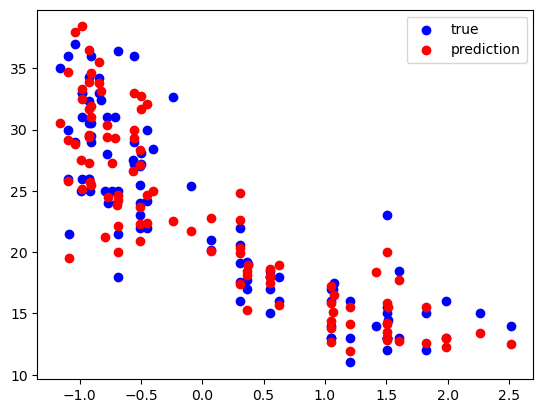

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.legend()